## Author: Arnab Datta


## Task 4: Security Analysis - Terrorism Data

An attempt to find the hot zone of terrorism and the related security issues and insights.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading dataset

In [2]:
data=pd.read_csv('globalterrorism.csv',encoding='ISO-8859-1')

C:\Users\arnab\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#checking the data structuring.

data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
#checking column names
x= data.columns
for i in x:
    print(i)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

In [7]:
#dimensionality of the data
data.shape

(181691, 135)

### Data cleaning and optimisation

In [8]:
data.rename(columns={ 'eventid':'EventID','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [9]:
data.head(100)

,EventID,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,197002280001,1970,2,28,NaN,0,NaN,102,Jordan,10,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
96,197003000001,1970,3,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
97,197003010001,1970,3,1,NaN,0,NaN,98,Italy,8,...,NaN,NaN,NaN,NaN,PGIS,1,0,1,1,NaN
98,197003010005,1970,3,1,NaN,0,NaN,217,United States,1,...,The perpetrators painted signs on nearby the b...,Committee on Government Operations United Stat...,"""Colorado R.O.T.C. Blast Attributed to Arsonis...","Robert W. Patterson, ""Crime & the American Res...",Hewitt Project,-9,-9,0,-9,NaN


In [10]:
#Curating a dataset consisting of necessary informations only

data2=data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
             'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [11]:
#checking on data 
data2.columns

Index(['Year', 'Month', 'Day', 'Country', 'state', 'Region', 'city',
       'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

In [12]:
data2.shape

(181691, 18)

In [13]:
data2.corr()

,Year,Month,Day,latitude,longitude,Killed,Wounded
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223
Killed,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375
Wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000


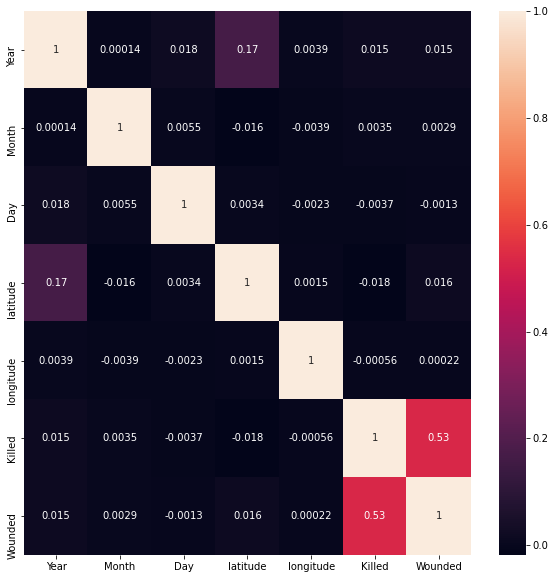

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data2.corr(), annot=True)

In [15]:
#checking on null values

data2.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

Im taking a risk guess that even though a few states and cities and a few more infromation are missing, yet the proprotion is very minor so there needs no operation for replacement that might actually affect the real collective analysis. Also motive and summary are high in number, so the analysis will exclude these two features as much as possible. 

### Region-wise analysis. 

Text(0.5, 1.0, 'Region-wise total terror attacks')

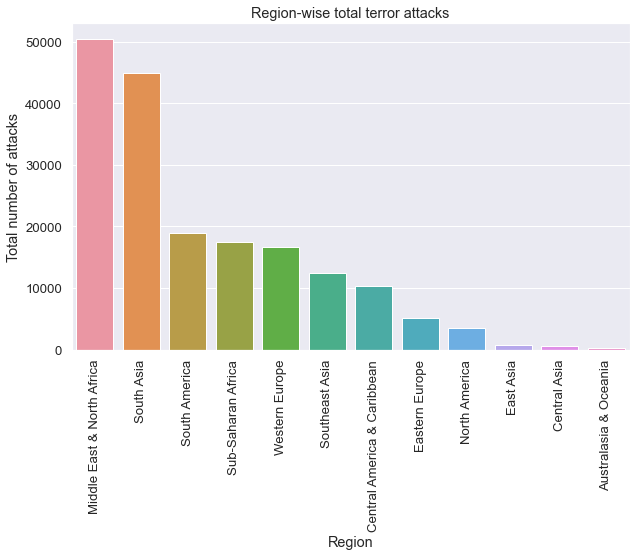

In [16]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2, palette= "viridis")
ax=sns.countplot(x='Region', data=data2, order = data2['Region'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set(ylabel='Total number of attacks')
plt.title("Region-wise total terror attacks")


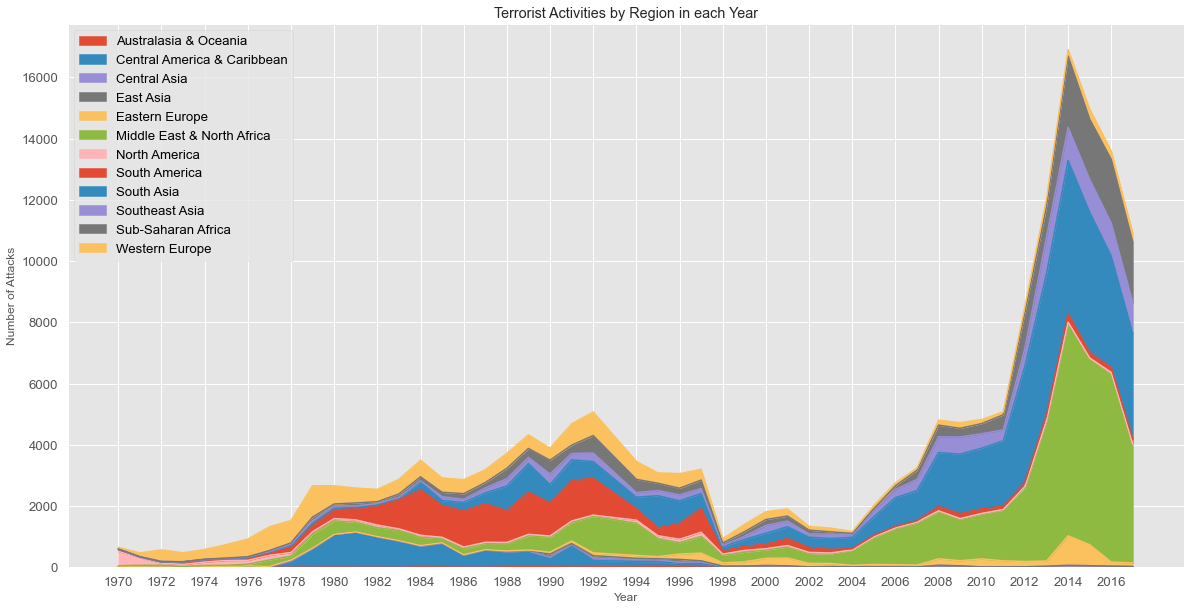

In [17]:
plt.style.use(['ggplot'])
pd.crosstab(data2.Year, data2.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
leg=plt.legend(loc='best')
for text in leg.get_texts():
    plt.setp(text, color = 'black')
plt.xticks(np.arange(min(data2['Year']), max(data2['Year'])+1, 2.0))
plt.show()

Middle East & North Africa and South Asia have extreme rise in terrorist attacks.

Text(0.5, 1.0, 'Region-wise total terror attacks')

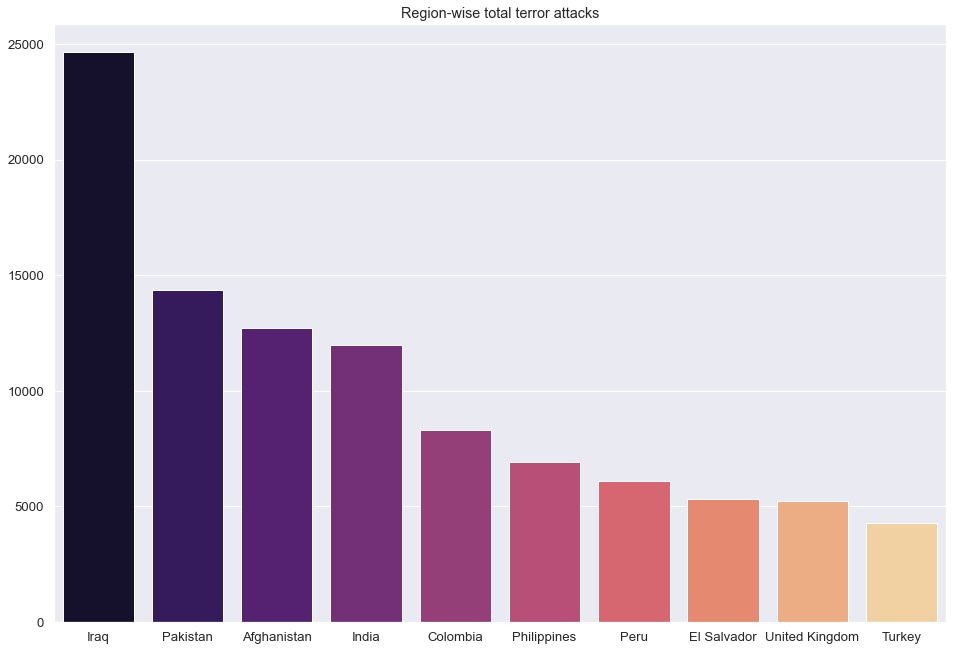

In [83]:
#top 10 Countries to have suffered attacks

plt.figure(figsize=(16,11))
sns.barplot(y = data2['Country'].value_counts()[:10].values,  x= data2['Country'].value_counts()[:10].index, 
            palette = 'magma');
ax.set(ylabel='Total number of attacks')
plt.title("Region-wise total terror attacks")


The countries of Iraq, Pakistan, Afghanistan and India have suffered the most terrorist attacks in the span of about 60 years

### Time-line analysis 

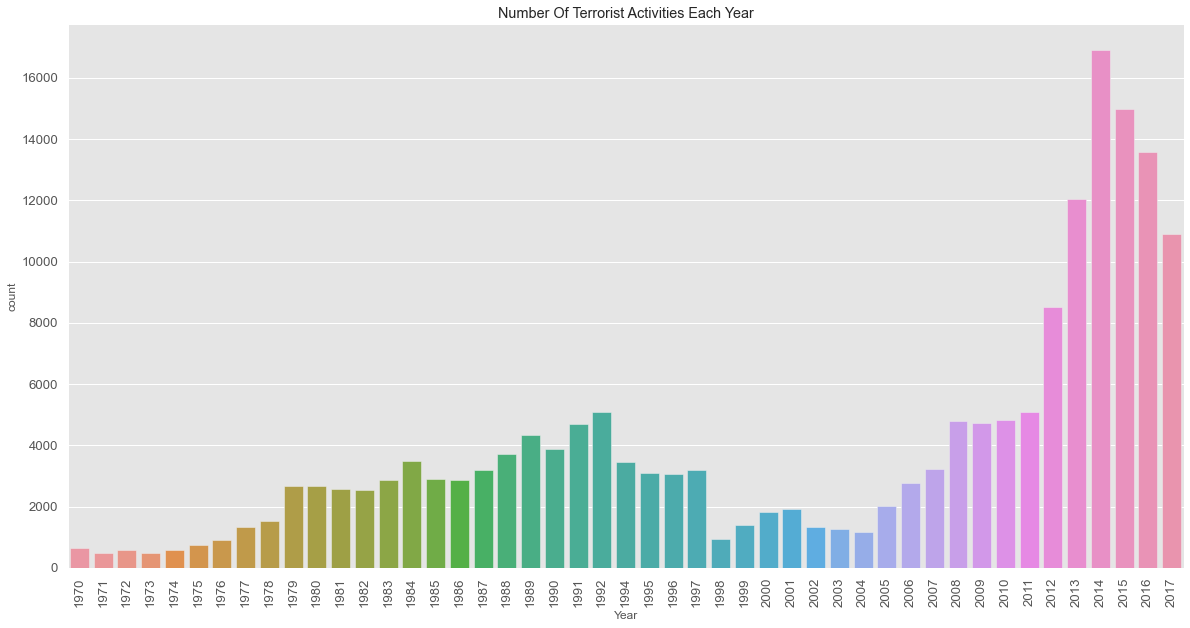

In [22]:
plt.subplots(figsize=(20,10))
sns.countplot('Year',data=data2)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

Extreme rise in attacks after 2011. So let's explore the concern after 2011.

In [49]:
#creating a dataframe with year wise count
Year = data2.Year.value_counts().rename_axis('year').reset_index(name='counts')
Year

,year,counts
0,2014,16903
1,2015,14965
2,2016,13587
3,2013,12036
4,2017,10900
5,2012,8522
6,2011,5076
7,1992,5071
8,2010,4826
9,2008,4805


In [63]:
#separating total attacks both side of estimated crucial year to affected terrorism increase.

above_2010=Year[(Year['year']>=2011)]['counts'].sum()
below_2011=Year[(Year['year']<2011)]['counts'].sum()
d = {'category': ['Attacks after 2010', 'Attacks before 2010'], 'count': [above_2010, below_2011]}
data_year_category = pd.DataFrame(data=d)
data_year_category 

,category,count
0,Attacks after 2010,81989
1,Attacks before 2010,99702


Text(0.5, 1.0, 'Attack comparison in the time-cut')

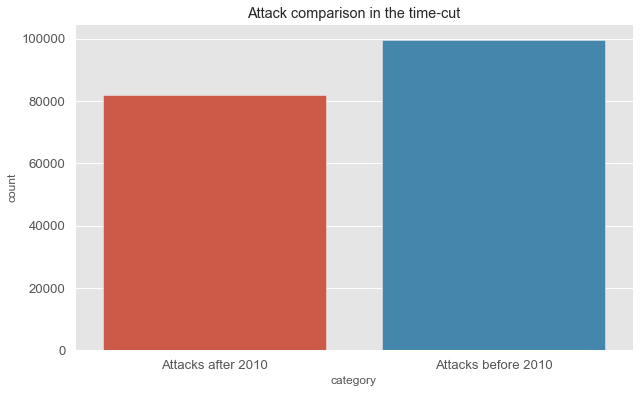

In [70]:
plt.figure(figsize=(10,6))
sns.barplot(x='category', y='count', data=data_year_category)
plt.title('Attack comparison in the time-cut')

We see that total attacks in 1970-2010 (40 years) and 2010-2017 (7 years) are very nearly equal. So 2010 has been a critical time to consider for the increase in attacks.   

In [72]:
#data to analyse is ideally after 2010. 
data3= data2[(data2['Year']>2010)]

### Analysis on attack type

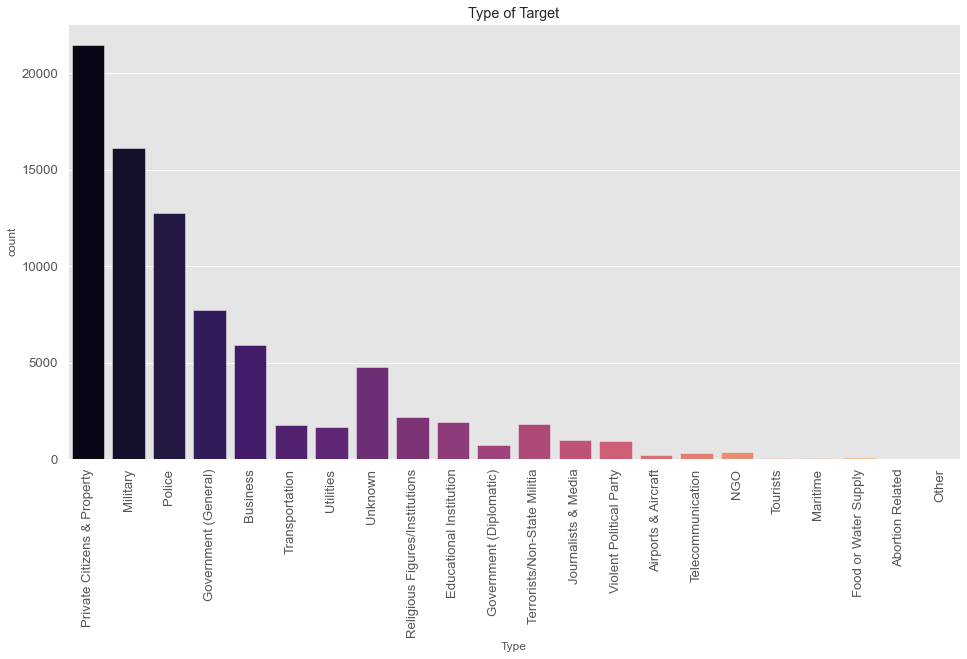

In [74]:
plt.figure(figsize=(16,8))
sns.countplot(data3['Target_type'],order=data2['Target_type'].value_counts().index,
              palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.title('Type of Target')
plt.show()

Total targets have been majorly on citizens. Let's explore the trend along time over these target type. 

In [140]:
inter1=data2.groupby(['Year','Target_type']).count().reset_index()
df_target= inter1[['Year','Target_type','Month']]
df_target=df_target[df_target['Year']>2010]
df_target

,Year,Target_type,Month
829,2011,Airports & Aircraft,16
830,2011,Business,513
831,2011,Educational Institution,219
832,2011,Food or Water Supply,10
833,2011,Government (Diplomatic),45
...,...,...,...
976,2017,Tourists,11
977,2017,Transportation,138
978,2017,Unknown,996
979,2017,Utilities,156


Text(0.5, 1.0, 'Comparison of target group over the recent years')

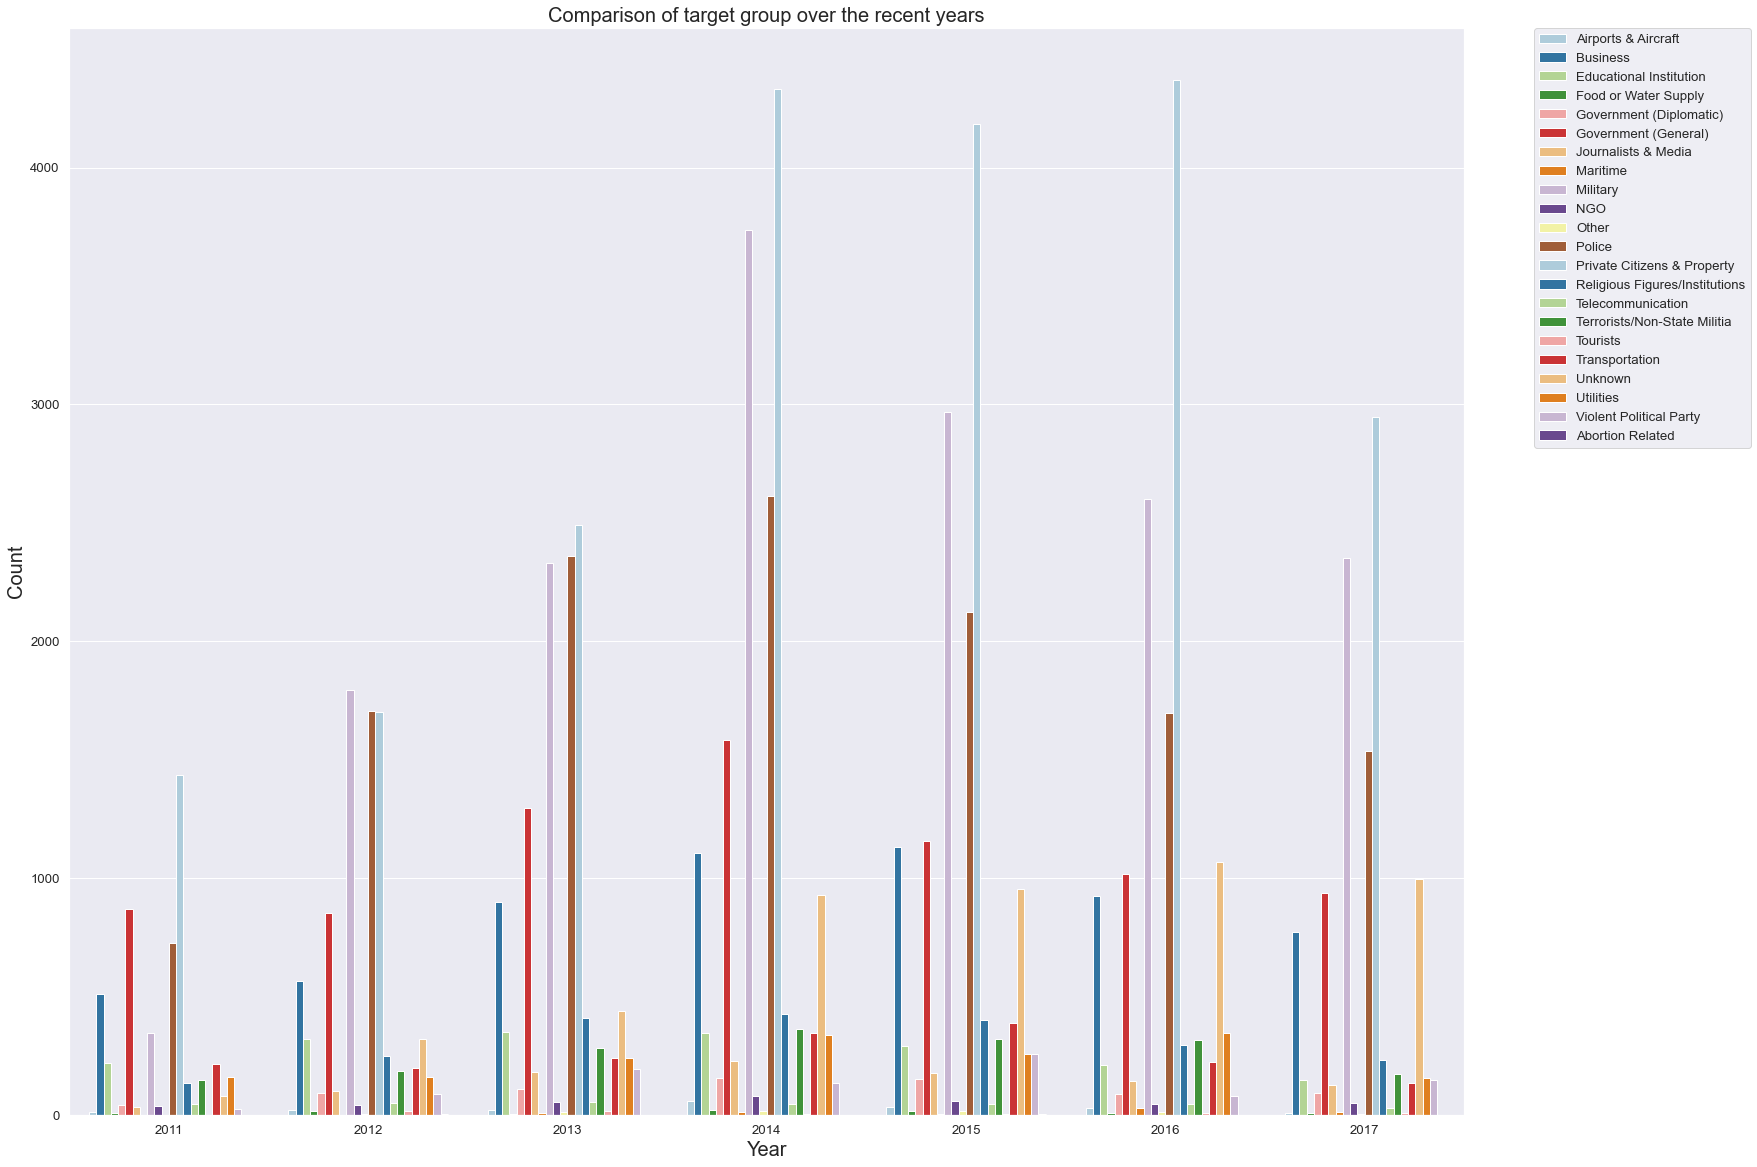

In [161]:
#plotting target type count per year.

plt.figure(figsize=(25,20))
ax=sns.barplot(x='Year', y='Month', hue='Target_type', data=df_target, palette="Paired")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel("Count", fontsize=20)
ax.set_xlabel("Year",fontsize=20)
ax.set_title("Comparison of target group over the recent years", fontsize=20)

We can see a consistant trend of attacks on attacks on military and police. But the highest attacks are on private citizens and that is of the biggest concern. 

In [162]:
inter1=data2.groupby(['Year','Weapon_type']).count().reset_index()
df_weapon= inter1[['Year','Weapon_type','Month']]
df_weapon=df_weapon[df_weapon['Year']>2010]
df_weapon

,Year,Weapon_type,Month
332,2011,Biological,1
333,2011,Chemical,1
334,2011,Explosives,2754
335,2011,Fake Weapons,1
336,2011,Firearms,1630
...,...,...,...
395,2017,Melee,307
396,2017,Other,10
397,2017,Sabotage Equipment,11
398,2017,Unknown,1254


Text(0.5, 1.0, 'Comparison of weapon usage over the recent years')

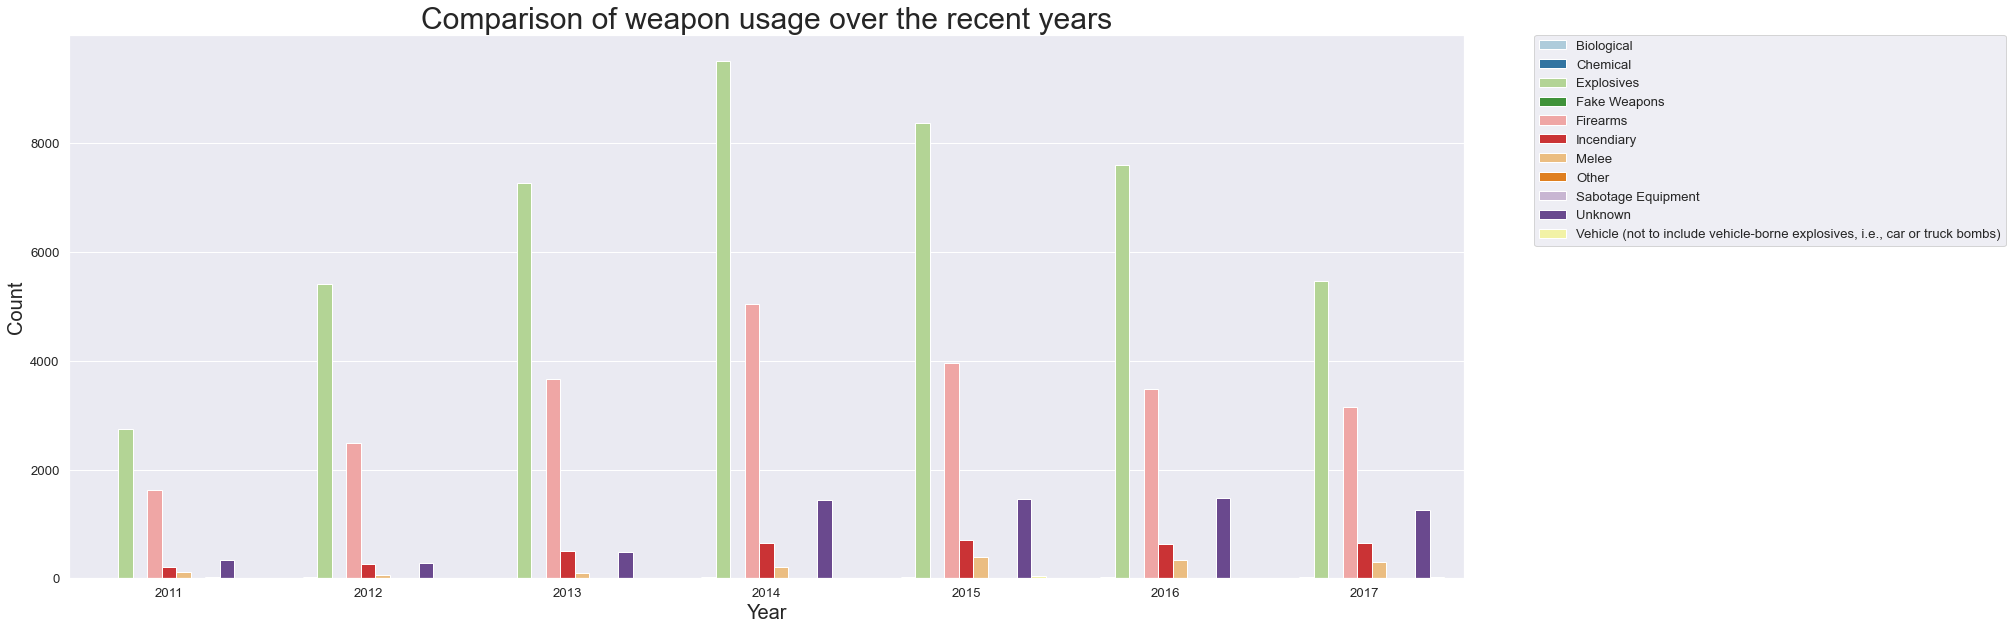

In [166]:
plt.figure(figsize=(25,10))
ax=sns.barplot(x='Year', y='Month', hue='Weapon_type', data=df_weapon, palette="Paired")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel("Count", fontsize=20)
ax.set_xlabel("Year",fontsize=20)
ax.set_title("Comparison of weapon usage over the recent years", fontsize=30)

Explosives and firearm take the lead in the usage for the attacks.

### Conclusions 

+ After 2010, the rate of attacks have remained consistantly high, so more analysis is to be done on the reasons using other surveys and informations.
+ Middle East, North America and South Asia needs more concentration in the recent years, as these regions have recorded the highest attacks in the recent past
+ The governments Iraq, Pakistan, Afghanistan and India need to be given special support for intelligence and security as these countries have been suffering the most attacks in the recent years. 
+ Area of general public should have increased security as most attacks are being done on innocent citizens.
+ The attacks are being mostly supported with high end explosives and firearms. So a strict global control on the export and import and productions of these explosives and firearms and disable the terrorists to execute their attacks. 